In [30]:
import pandas as pd
import numpy as np
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data.csv")

In [3]:
print(data.head())

   Year  Total All Fuels  Coal   Oil Natural gas Nuclear  Hydro  \
0  1920             3.68  3.67  0.02          -       -     0.0   
1  1921             3.19  3.10  0.09          -       -     0.0   
2  1922             3.21  3.17  0.04          -       -     0.0   
3  1923             3.62  3.57  0.05          -       -     0.0   
4  1924             3.90  3.85  0.05          -       -     0.0   

  Wind and Solar Coke and breeze  Others  
0            NaN              -      NaN  
1            NaN              -      NaN  
2            NaN              -      NaN  
3            NaN              -      NaN  
4            NaN              -      NaN  


In [4]:
data.columns

Index(['Year', 'Total All Fuels', 'Coal', 'Oil', 'Natural gas', 'Nuclear',
       'Hydro', 'Wind and Solar', 'Coke and breeze', 'Others'],
      dtype='object')

In [5]:
data.dtypes

Year                 int64
Total All Fuels    float64
Coal               float64
Oil                float64
Natural gas         object
Nuclear             object
Hydro              float64
Wind and Solar      object
Coke and breeze     object
Others             float64
dtype: object

In [6]:
print(data.isnull().sum())

Year                0
Total All Fuels     0
Coal                0
Oil                 0
Natural gas         0
Nuclear             0
Hydro               0
Wind and Solar     67
Coke and breeze     0
Others             67
dtype: int64


In [7]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [8]:
cat_col,num_col=extract_cat_num(data)

In [9]:
cat_col

['Natural gas', 'Nuclear', 'Wind and Solar', 'Coke and breeze']

In [10]:
for col in cat_col:
    print('{} has {} values '.format(col,data[col].unique()))
    print('\n')

Natural gas has ['- ' '0.11' '0.64' '1.61' '2.46' '2.14' '1.28' '0.86' '0.54' '0.42'
 '0.21' '0.18' '0.91' '0.97' '0.56' '0.57' '1.54' '7.04' '10.1' '13.27'
 '17.36' '21.57' '23.02' '27.13' '27.91' '26.87' '28.33' '27.85' '29.25'
 '28.52' '26.78' '30.6' '32.4' '30.9' '32.43' '26.58' '18.62' '17.7'
 '18.73' '18.28' '25.63' '24.6' '23.51' '23.47' '20.29'] values 


Nuclear has ['- ' '0.02' '0.13' '0.1' '0.38' '0.65' '0.75' '1.09' '1.86' '2.39' '4.34'
 '5.8' '6.68' '7.51' '7.91' '7' '7.37' '7.87' '7.46' '8.97' '8.12' '9.56'
 '10.64' '9.96' '10.23' '9.91' '10.18' '11.88' '13.47' '14.5' '16.5'
 '15.44' '14.44' '16.57' '17.74' '16.26' '17.43' '18.45' '21.58' '21.2'
 '21.25' '22.18' '21.98' '23.44' '22.22' '19.64' '20.77' '20.1' '20.04'
 '18.16' '18.37' '17.13' '14.04' '11.91' '15.23' '13.93' '15.63' '15.21'
 '13.85' '15.48' '15.41' '15.12' '14.06' '12.09' '10.72'] values 


Wind and Solar has [nan '- ' '0.04' '0.06' '0.08' '0.07' '0.11' '0.17' '0.25' '0.36' '0.46'
 '0.61' '0.8' '0.89' '1.39'

In [11]:
data=data.replace(to_replace = '- ', value = '0.0')
data=data.replace(to_replace = '-', value = '0.0')

In [12]:
data.fillna(0)

,Year,Total All Fuels,Coal,Oil,Natural gas,Nuclear,Hydro,Wind and Solar,Coke and breeze,Others
0,1920,3.68,3.67,0.02,0.0,0.0,0.00,0,0.0,0.00
1,1921,3.19,3.10,0.09,0.0,0.0,0.00,0,0.0,0.00
2,1922,3.21,3.17,0.04,0.0,0.0,0.00,0,0.0,0.00
3,1923,3.62,3.57,0.05,0.0,0.0,0.00,0,0.0,0.00
4,1924,3.90,3.85,0.05,0.0,0.0,0.00,0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
96,2016,63.67,7.53,0.58,25.63,15.41,0.46,4.09,0.0,9.96
97,2017,61.71,5.55,0.54,24.6,15.12,0.51,5.25,0.0,10.13
98,2018,59.88,4.24,0.49,23.51,14.06,0.47,5.98,0.0,11.13
99,2019,56.87,1.85,0.50,23.47,12.09,0.50,6.57,0.0,11.90


In [13]:
for i in range(len(cat_col)) :
    data[cat_col[i]] = data[cat_col[i]].astype(float)

In [14]:
data.dtypes

Year                 int64
Total All Fuels    float64
Coal               float64
Oil                float64
Natural gas        float64
Nuclear            float64
Hydro              float64
Wind and Solar     float64
Coke and breeze    float64
Others             float64
dtype: object

In [15]:
data=data.fillna(0)

In [16]:
print(data.isnull().sum())

Year               0
Total All Fuels    0
Coal               0
Oil                0
Natural gas        0
Nuclear            0
Hydro              0
Wind and Solar     0
Coke and breeze    0
Others             0
dtype: int64


<AxesSubplot:xlabel='Year', ylabel='Wind and Solar'>

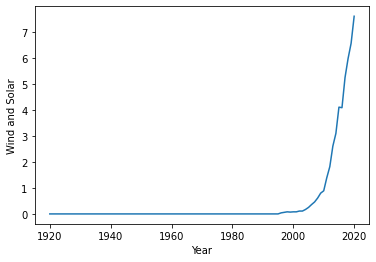

In [17]:
sns.lineplot(data=data, x="Year", y="Wind and Solar")

In [20]:
data.to_csv("data2.csv")

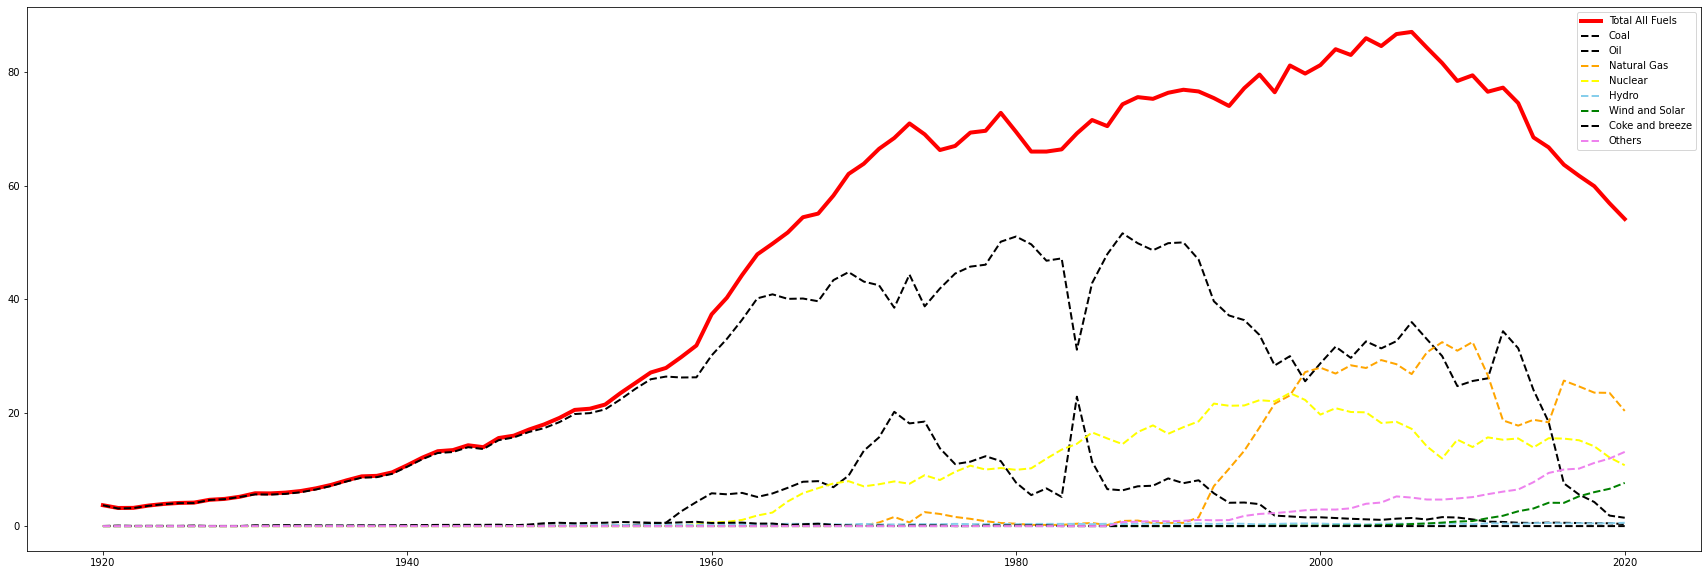

In [43]:
df=data
plt.rcParams["figure.figsize"] = (30,10)
# multiple line plots
plt.plot( 'Year', 'Total All Fuels', data=df, marker='', markerfacecolor='blue', markersize=12, color='red', linewidth=4)
plt.plot( 'Year', 'Coal', data=df, marker='', color='black', linewidth=2,linestyle='dashed')
plt.plot( 'Year', 'Oil', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="Oil")
plt.plot( 'Year', 'Natural gas', data=df, marker='', color='orange', linewidth=2, linestyle='dashed', label="Natural Gas")
plt.plot( 'Year', 'Nuclear', data=df, marker='', color='yellow', linewidth=2, linestyle='dashed', label="Nuclear")
plt.plot( 'Year', 'Hydro', data=df, marker='', color='skyblue', linewidth=2, linestyle='dashed', label="Hydro")
plt.plot( 'Year', 'Wind and Solar', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label="Wind and Solar")
plt.plot( 'Year', 'Coke and breeze', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="Coke and breeze")
plt.plot( 'Year', 'Others', data=df, marker='', color='violet', linewidth=2, linestyle='dashed', label="Others")


# show legend
plt.legend()

# show graph
plt.show()

In [51]:
data["Renewable"]=data["Hydro"]+data["Wind and Solar"]
data["Non-Renewable"] = data['Coal']+ data['Oil']+ data['Natural gas']+data['Coke and breeze']
data["Green"]=data["Renewable"]+data["Nuclear"]
                                     

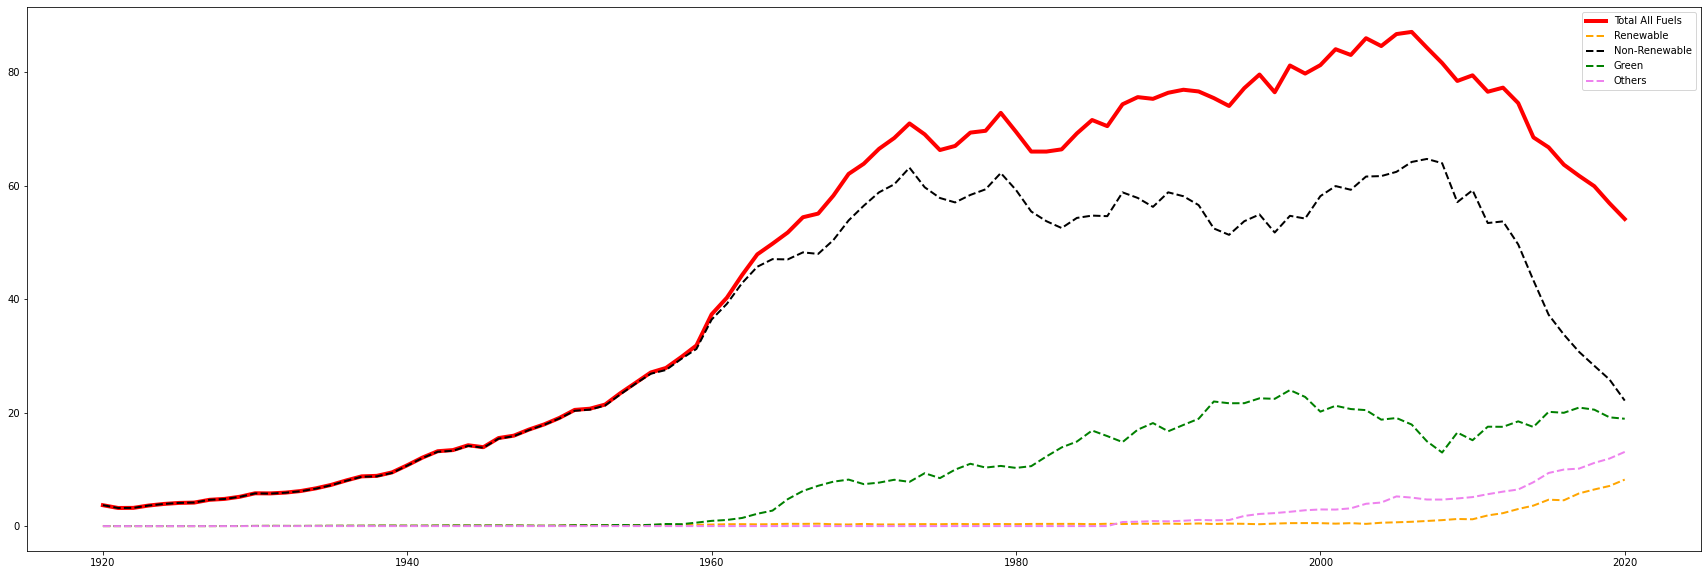

In [55]:
# multiple line plots
plt.plot( 'Year', 'Total All Fuels', data=df, marker='', markerfacecolor='blue', markersize=12, color='red', linewidth=4)
plt.plot( 'Year', 'Renewable', data=df, marker='', color='Orange', linewidth=2,linestyle='dashed',label="Renewable")
plt.plot( 'Year', 'Non-Renewable', data=df, marker='', color='black', linewidth=2, linestyle='dashed', label="Non-Renewable")
plt.plot( 'Year', 'Green', data=df, marker='', color='Green', linewidth=2, linestyle='dashed', label="Green")
plt.plot( 'Year', 'Others', data=df, marker='', color='violet', linewidth=2, linestyle='dashed', label="Others")


# show legend
plt.legend()

# show graph
plt.show()

In [54]:
data.head(20)

,Year,Total All Fuels,Coal,Oil,Natural gas,Nuclear,Hydro,Wind and Solar,Coke and breeze,Others,Renewable,Non-Renewable,Green
0,1920,3.68,3.67,0.02,0.0,0.0,0.00,0.0,0.00,0.0,0.00,3.69,0.00
1,1921,3.19,3.10,0.09,0.0,0.0,0.00,0.0,0.00,0.0,0.00,3.19,0.00
2,1922,3.21,3.17,0.04,0.0,0.0,0.00,0.0,0.00,0.0,0.00,3.21,0.00
3,1923,3.62,3.57,0.05,0.0,0.0,0.00,0.0,0.00,0.0,0.00,3.62,0.00
4,1924,3.90,3.85,0.05,0.0,0.0,0.00,0.0,0.00,0.0,0.00,3.90,0.00
5,1925,4.08,4.04,0.04,0.0,0.0,0.00,0.0,0.00,0.0,0.00,4.08,0.00
6,1926,4.14,4.05,0.10,0.0,0.0,0.00,0.0,0.00,0.0,0.00,4.15,0.00
7,1927,4.63,4.60,0.03,0.0,0.0,0.00,0.0,0.00,0.0,0.00,4.63,0.00
8,1928,4.79,4.75,0.03,0.0,0.0,0.01,0.0,0.00,0.0,0.01,4.78,0.01
9,1929,5.17,5.13,0.03,0.0,0.0,0.01,0.0,0.00,0.0,0.01,5.16,0.01
